In [5]:
!unzip '/content/drive/MyDrive/newexample.zip'

Archive:  /content/drive/MyDrive/newexample.zip
replace newexample/birds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Check Versions
import tensorflow as tf
import keras as k

print(tf.__version__)
print(k.__version__)

2.12.0
2.12.0


In [8]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential, load_model
from keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [9]:
IMAGE_SIZE = [224, 224]

In [10]:
train_directory = '/content/newexample/train'
test_directory = '/content/newexample/test'
valid_directory = '/content/newexample/valid'

In [11]:
# useful for getting number of classes
folders = glob('/content/newexample/train/*')
len(folders)

10

In [12]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [13]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [14]:
# View Summary of structure of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [15]:
# Compile the model with a smaller learning rate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation with more aggressive settings
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1601 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [18]:
len(training_set), len(test_set)

(51, 2)

In [19]:
# Learning Rate Scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=35,  # You can experiment with the number of epochs
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/35
51/51 [==============================] - 67s 820ms/step - loss: 2.3668 - accuracy: 0.1006 - val_loss: 2.3043 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/35
51/51 [==============================] - 29s 555ms/step - loss: 2.2992 - accuracy: 0.1068 - val_loss: 2.3036 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 3/35
51/51 [==============================] - 29s 567ms/step - loss: 2.2990 - accuracy: 0.1062 - val_loss: 2.3076 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 4/35
51/51 [==============================] - 29s 570ms/step - loss: 2.2966 - accuracy: 0.1037 - val_loss: 2.3074 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 5/35
51/51 [==============================] - 31s 597ms/step - loss: 2.2974 - accuracy: 0.1006 - val_loss: 2.3063 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 6/35
51/51 [==============================] - 29s 572ms/step - loss: 2.2968 - accuracy: 0.1168 - val_loss: 2.3097 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 7/35
51/51 [==============================] - 30s 576ms/st

In [20]:
model.save('VGG16model1.h5')

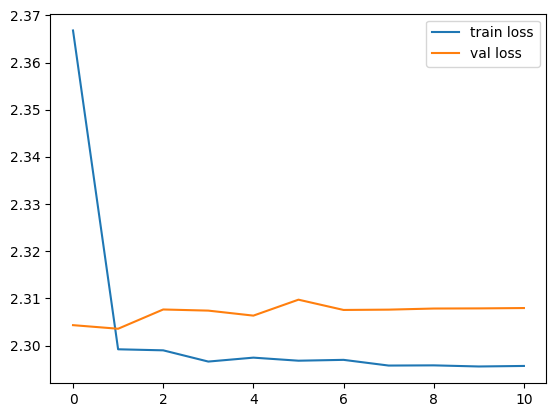

In [21]:
# Loss
plt.plot(r.history['loss'], label='train loss')
if 'val_loss' in r.history:
    plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

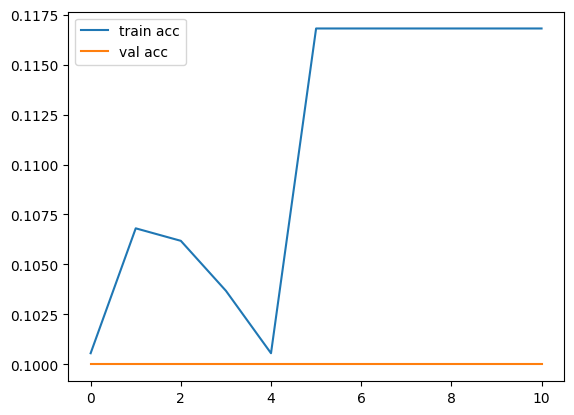

In [22]:
# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
if 'val_accuracy' in r.history:
    plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

2/2 [==============================] - 0s 165ms/step


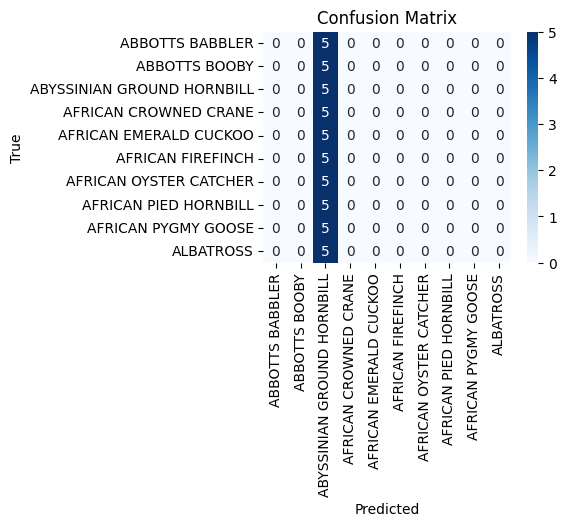

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predicted labels for the test set
Y_true = test_set.classes
Y_pred = model.predict(test_set).argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_true, Y_pred)

# Get class names
class_names = list(test_set.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [24]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Input, Lambda, Dense, Flatten
import tensorflow as tf

model1 = load_model('./VGG16model1.h5',compile=False)

In [25]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [26]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 39ms/step


'ABYSSINIAN GROUND HORNBILL'

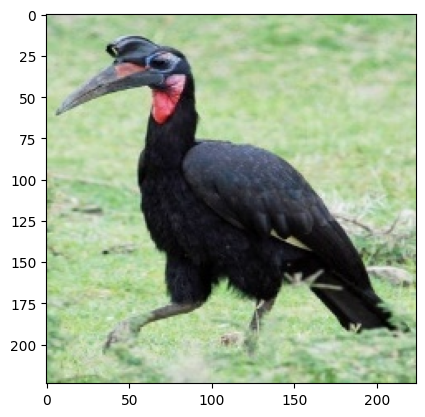

In [30]:
img='/content/newexample/valid/ABYSSINIAN GROUND HORNBILL/3.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 39ms/step


'ABYSSINIAN GROUND HORNBILL'

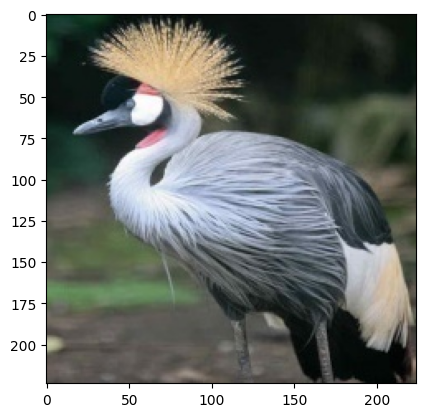

In [29]:
img = '/content/newexample/valid/AFRICAN CROWNED CRANE/3.jpg'
pic = load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)